In [ ]:
import os
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/abc')
files = os.listdir()


In [ ]:

from PIL import Image
from skimage import io
import cv2 as cv
from google.colab.patches import cv2_imshow
images = []
y = []
#images = np.array(images)
h = 0
cnt = 0
for i in files:
    print(i)
    if ord(i[0]) >= 65:
        #print(ord(i[0])-55)
        #print(i[0])
        #print(type(ord(i[0])-55))
        y.append((ord(i[0])-55)-1)
        #print(y)
    else:
        #print(i[0])
        y.append(int(i[0])-1)
        #print(y)
    #print(y)
    #pic = cv.imread(i)
    #pic = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
    #print(pic.shape)
    #pic = cv.resize(pic, (256, 256))
    #images.append(pic)


Streaming output truncated to the last 5000 lines.
J_61.jpg
J_63.jpg
J_64.jpg
J_67.jpg
J_60.jpg
J_73.jpg
J_70.jpg
J_72.jpg
J_71.jpg
J_69.jpg
J_68.jpg
J_77.jpg
J_74.jpg
J_76.jpg
J_75.jpg
J_82.jpg
J_79.jpg
J_80.jpg
J_78.jpg
J_81.jpg
J_83.jpg
J_85.jpg
J_84.jpg
J_86.jpg
J_89.jpg
J_90.jpg
J_87.jpg
J_88.jpg
J_94.jpg
J_92.jpg
J_91.jpg
J_93.jpg
J_96.jpg
J_95.jpg
J_97.jpg
J_98.jpg
J_99.jpg
J_101.jpg
J_102.jpg
J_100.jpg
J_103.jpg
J_106.jpg
J_107.jpg
J_105.jpg
J_104.jpg
J_111.jpg
J_112.jpg
J_108.jpg
J_110.jpg
J_109.jpg
J_116.jpg
J_113.jpg
J_115.jpg
J_114.jpg
J_117.jpg
J_120.jpg
J_121.jpg
J_119.jpg
J_118.jpg
J_125.jpg
J_122.jpg
J_124.jpg
J_123.jpg
J_130.jpg
J_128.jpg
J_129.jpg
J_126.jpg
J_127.jpg
J_131.jpg
J_135.jpg
J_133.jpg
J_134.jpg
J_132.jpg
J_138.jpg
J_137.jpg
J_136.jpg
J_139.jpg
J_141.jpg
J_140.jpg
J_143.jpg
J_142.jpg
J_144.jpg
J_148.jpg
J_145.jpg
J_147.jpg
J_149.jpg
J_146.jpg
J_153.jpg
J_150.jpg
J_152.jpg
J_151.jpg
J_154.jpg
J_156.jpg
J_157.jpg
J_155.jpg
J_159.jpg
J_161.jpg
J_158.jpg
J_160.

In [ ]:
import numpy as np
"""
x = np.array(images)
print(x[0])
y = np.array(y)
"""
x = np.load("/content/drive/MyDrive/x_abc.npy")
#y = np.load("/content/drive/MyDrive/y_abc.npy")
y = np.array(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x = 0

In [ ]:
print(y_train.shape)

(8676,)


In [ ]:
print(y_test.shape)

(2170,)


In [ ]:
#y = np.array(y)
"""
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
enc = enc.fit(y_train)
y_train = enc.transform(y_train).toarray()
y_test = enc.transform(y_test).toarray()
"""

"\nfrom sklearn.preprocessing import OneHotEncoder\nenc = OneHotEncoder(handle_unknown='ignore')\ny_train = y_train.reshape(-1, 1)\ny_test = y_test.reshape(-1, 1)\nenc = enc.fit(y_train)\ny_train = enc.transform(y_train).toarray()\ny_test = enc.transform(y_test).toarray()\n"

In [ ]:
from keras.utils import np_utils

n_classes = 35
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape, y_test.shape)

Shape before one-hot encoding:  (8676, 1)
Shape after one-hot encoding:  (8676, 35) (2170, 35)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the data to help with the training
x_train /= 255
x_test /= 255

In [ ]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
inception = InceptionV3(include_top=False, input_shape=(256, 256, 3))

x = inception.output
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(35, activation='softmax')(x)

model = Model(inception.input, output)

for layers in inception.layers:
    layers.trainable = False
    
model.compile(optimizer='adam', loss="categorical_crossentropy",
              metrics=["accuracy"])

earlystop = EarlyStopping(monitor='val_accuracy', patience=20,
                          verbose=1)

In [ ]:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_test, y_test),
                 steps_per_epoch=100, validation_steps=10,
                 epochs=20, callbacks=[earlystop])

Epoch 1/20
100/100 [==============================] - 115s 763ms/step - loss: 5.1617 - accuracy: 0.3151 - val_loss: 0.4598 - val_accuracy: 0.8659
Epoch 2/20
100/100 [==============================] - 65s 651ms/step - loss: 0.3031 - accuracy: 0.9189 - val_loss: 0.1831 - val_accuracy: 0.9521
Epoch 3/20
100/100 [==============================] - 65s 651ms/step - loss: 0.1039 - accuracy: 0.9755 - val_loss: 0.1158 - val_accuracy: 0.9613
Epoch 4/20
100/100 [==============================] - 65s 650ms/step - loss: 0.0540 - accuracy: 0.9901 - val_loss: 0.0840 - val_accuracy: 0.9774
Epoch 5/20
100/100 [==============================] - 65s 651ms/step - loss: 0.0353 - accuracy: 0.9949 - val_loss: 0.0700 - val_accuracy: 0.9779
Epoch 6/20
100/100 [==============================] - 65s 649ms/step - loss: 0.0180 - accuracy: 0.9969 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 7/20
100/100 [==============================] - 65s 650ms/step - loss: 0.0085 - accuracy: 0.9998 - val_loss: 0.0421 - val_a

In [ ]:
import tensorflow as tf

export_dir = '/content/drive/MyDrive/tmp_new_IV3/saved_model'
#tf.saved_model.save(model, export_dir)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/tmp_new_IV3/saved_model')

In [ ]:
print(new_model)

In [ ]:
os.chdir('/content/drive/MyDrive/Cropped_Labelled_Images/k')
files = os.listdir()

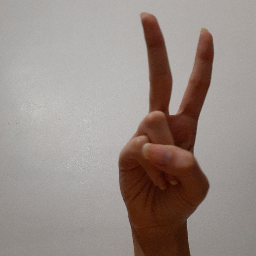

2


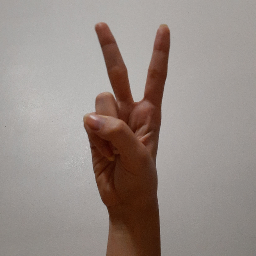

2


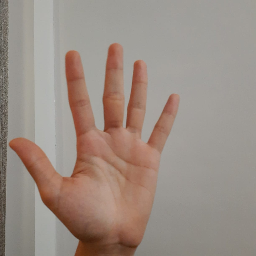

5


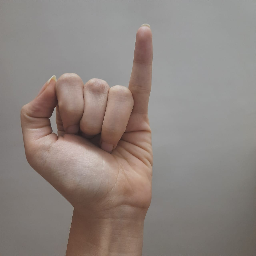

6


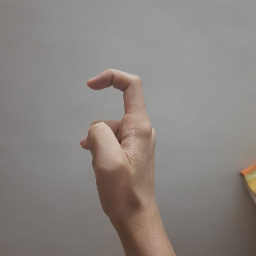

7


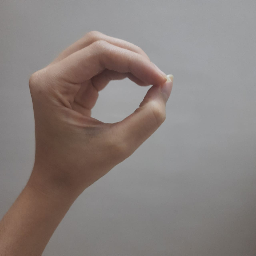

24


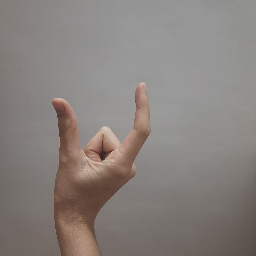

30


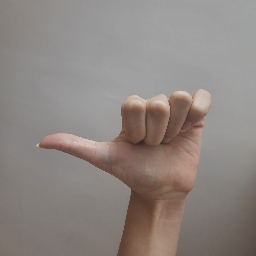

9


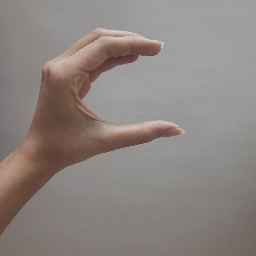

12


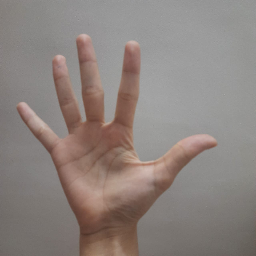

31


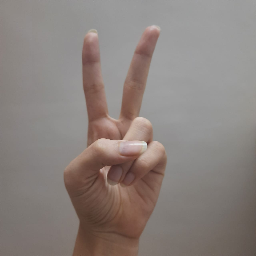

2


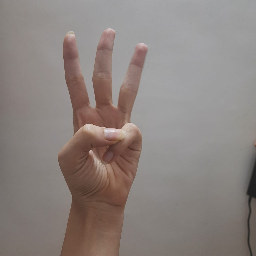

3


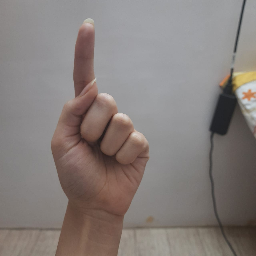

6


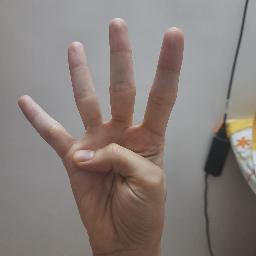

3


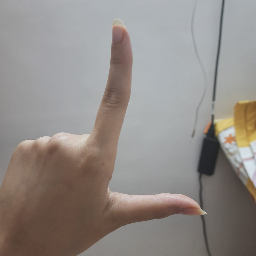

26


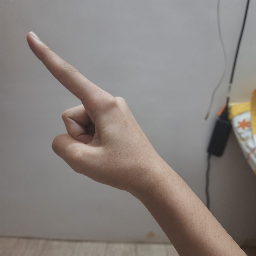

6


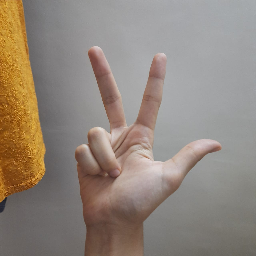

31


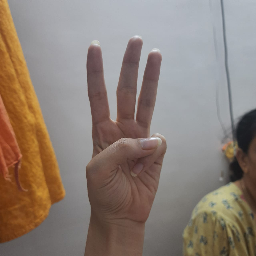

2


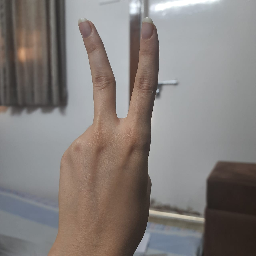

34


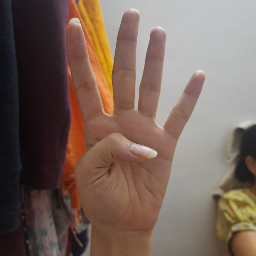

3


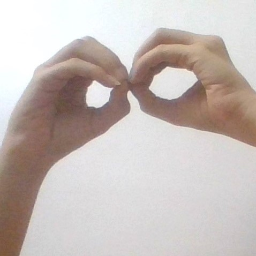

11


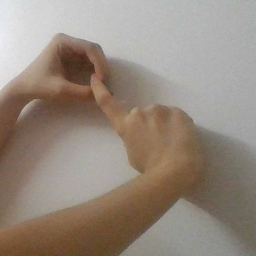

25


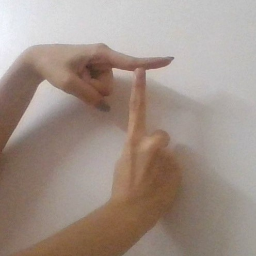

29


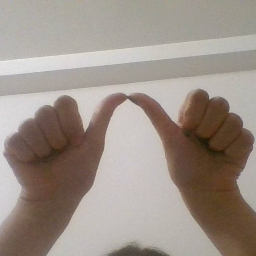

10


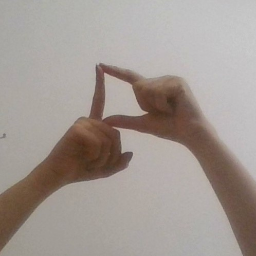

26


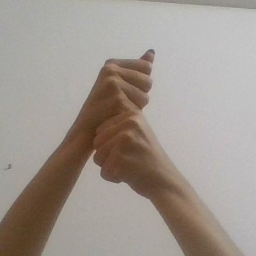

16


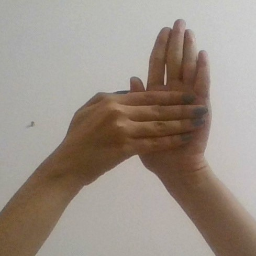

17


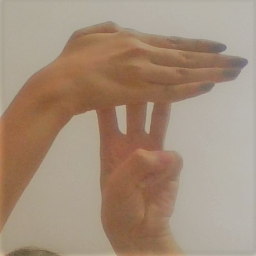

22


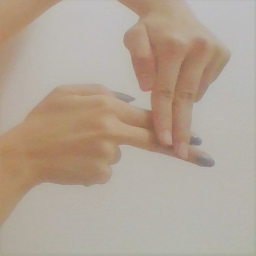

15


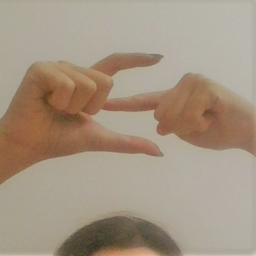

19


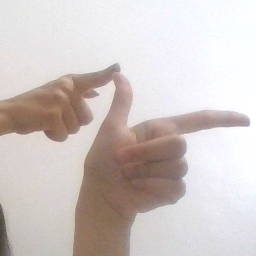

35


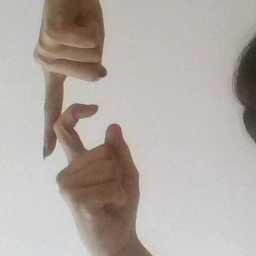

1


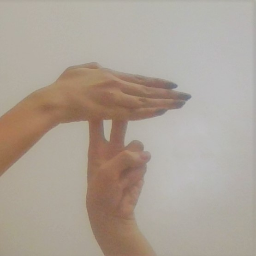

27


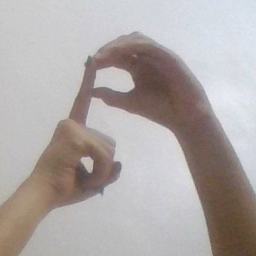

7


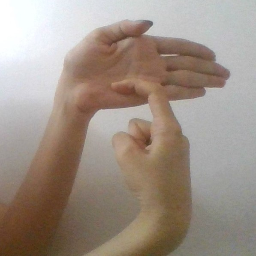

27


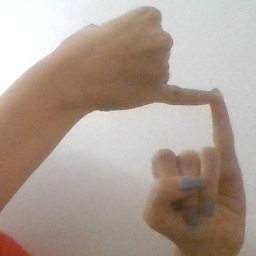

19


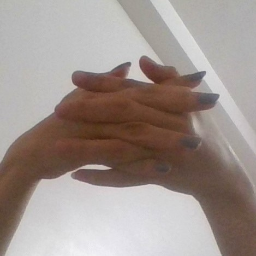

17


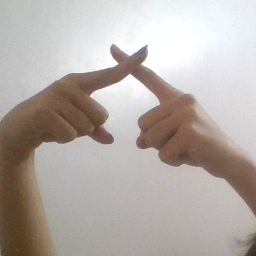

33


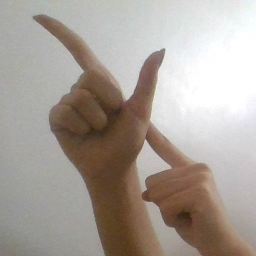

34


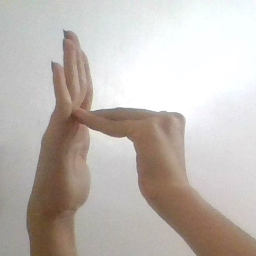

35


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import glob
import random
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage.transform import resize
images = []
y = []
#images = np.array(images)
h = 0
cnt = 0
for i in files:
    #print(y)
    pic = cv2.imread(i)
    #pic = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
    #print(pic.shape)
    pic = cv2.resize(pic, (256, 256))
    #cv2_imshow(pic)
    key = cv2.waitKey(0)
    images.append(pic)
x = np.array(images)
x = x.astype('float32')
x /= 255 
t = new_model.predict(x)

x = 0
for i in files:
    #print(i)
    pic = cv2.imread(i)
    pic = cv2.resize(pic, (256, 256))
    cv2_imshow(pic)
    print(t[x].argmax()+1)
    x += 1
cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf
import pathlib

#export_dir = '/content/drive/MyDrive/I_tmp_new/saved_model'
#tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()
with open('/content/drive/MyDrive/I_tmp_new/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpfqj0ykyy/assets


In [ ]:
import numpy as np
import tensorflow as tf
import cv2

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/I_tmp_new/model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
pic = cv2.imread('/content/drive/MyDrive/Cropped_Labelled_Images/k/2_.jpeg')
pic=cv2.resize(pic,(256,256))
pic = pic.astype('float32')
pic /= 255
pic = np.reshape(pic,(1,256,256,3))

interpreter.set_tensor(input_details[0]['index'], pic)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[9.6874872e-05 9.8043835e-01 1.9261792e-02 1.8837748e-04 2.1200197e-12
  1.8740395e-06 9.9862447e-09 8.4998437e-06 7.7225948e-11 9.3821253e-12
  2.0430639e-06 6.7984958e-11 6.5547155e-08 5.9296803e-09 2.0248931e-09
  7.1445069e-15 3.0451035e-13 2.5795055e-07 9.0679068e-11 2.1513616e-11
  4.6045960e-07 1.7557194e-11 5.6550409e-10 3.4100034e-09 4.3903096e-11
  2.9971119e-12 2.6676753e-12 4.3956199e-08 1.2541382e-08 8.3868634e-10
  1.7877136e-11 1.5684615e-11 1.5645473e-11 1.2522105e-06 8.7317646e-09]]


In [ ]:
print(pic.shape)

(1280, 1280, 3)
